## Time Series Forecasting Using Facebook FBProphet

FBProphet is an open source library provided by Facebook for forecasting time series data wherein non-linear data are fit with daily, weekly, monthly, and yearly seasonality. It is completely open source.

In [1]:
pip install Cython numpy


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install prophet


Note: you may need to restart the kernel to use updated packages.


In [3]:
from prophet import Prophet

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [6]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


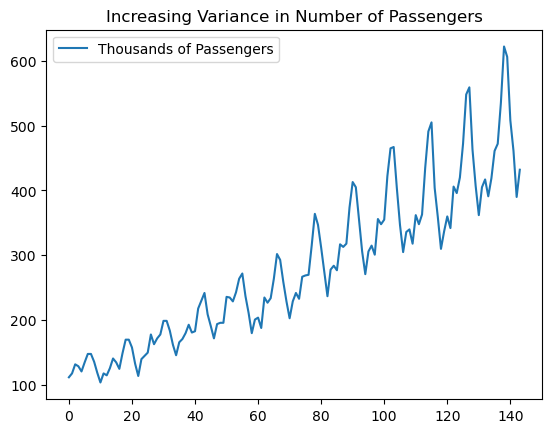

In [7]:
df.plot()
plt.title('Increasing Variance in Number of Passengers')
plt.show()

In [8]:
#drop last row due to bad data and change column names since FBProphet requires different values
df.columns = ['ds', 'y'] #output is y, datetime is ds
df.drop(144, axis = 0, inplace = True)

In [9]:
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [10]:
df.tail()

,ds,y
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [11]:
#ds is that of string type, we need to change it to datetime type
df['ds'] = pd.to_datetime(df['ds'])

In [12]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [13]:
dir(Prophet) #import prophet class, we will use inbuilt functions

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic'

In [14]:
#initialize model
model = Prophet()

In [15]:
df.columns

Index(['ds', 'y'], dtype='object')

In [16]:
model.fit(df) #fit model on df

16:35:12 - cmdstanpy - INFO - Chain [1] start processing
16:35:12 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [19]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


After fitting model, create future dates of 365 days. So, we will appeal data for the next 365 days to df.

In [21]:
future_dates = model.make_future_dataframe(periods = 365)
future_dates.tail() #So, now we have appended 365 days until 1961 to the data.

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


After creating the future dates, we will make predictions.

In [22]:
prediction = model.predict(future_dates)

In [23]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.776428,57.058832,112.764012,107.776428,107.776428,-21.362581,-21.362581,-21.362581,-21.362581,-21.362581,-21.362581,0.0,0.0,0.0,86.413847
1,1949-02-01,109.911280,49.967824,107.019614,109.911280,109.911280,-30.015161,-30.015161,-30.015161,-30.015161,-30.015161,-30.015161,0.0,0.0,0.0,79.896119
2,1949-03-01,111.839534,82.928158,140.859385,111.839534,111.839534,-0.474648,-0.474648,-0.474648,-0.474648,-0.474648,-0.474648,0.0,0.0,0.0,111.364886
3,1949-04-01,113.974386,81.459245,137.908809,113.974386,113.974386,-4.908798,-4.908798,-4.908798,-4.908798,-4.908798,-4.908798,0.0,0.0,0.0,109.065588
4,1949-05-01,116.040373,82.960715,143.012168,116.040373,116.040373,-3.609899,-3.609899,-3.609899,-3.609899,-3.609899,-3.609899,0.0,0.0,0.0,112.430473


We only want ds, yhatlower and yhat upper to consider for our dataset

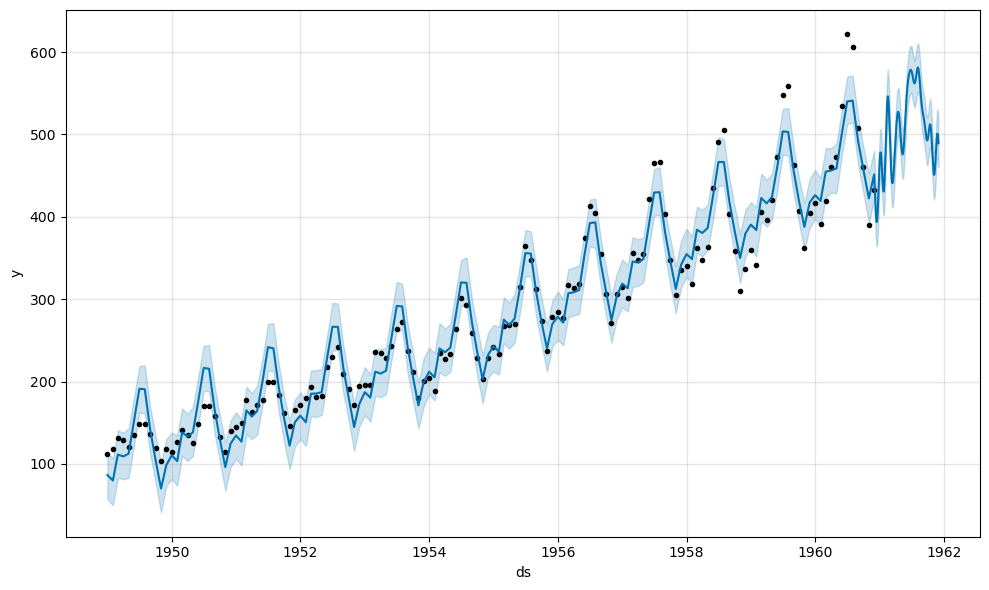

In [24]:
model.plot(prediction)

The dotted points are of real data, the blue line is the projection, and the light blue space is the trend space.

Now, with cross validation we need to check accuracy, mean absolute error, mean squared error etc.

First, we will visualize each components (trends, yearly).

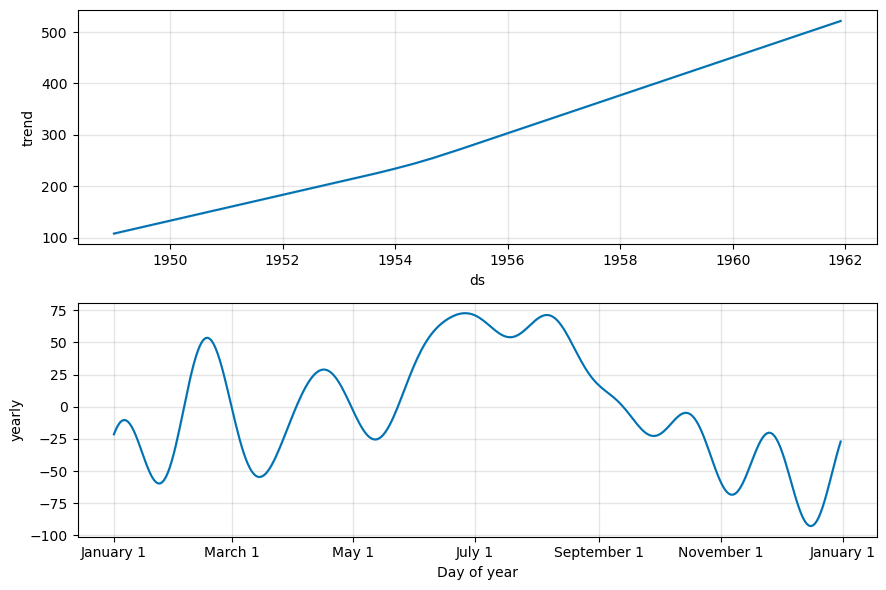

In [25]:
model.plot_components(prediction)

The above graphs suggest that as the years go by, the number of passengers will increase. The yearly trend is show as well.

In time series analysis, the cross validation is different.

Suppose we have a dataset of all values from 1960 to 1962, cross validation will get applied such that 1960-1961 will be our train dataset and 1961-1962 will be the test dataset (used in prediction), and finally 1962-1963 will be the validation dataset containing the projections.

In [27]:
from prophet.diagnostics import cross_validation
#initial - 2 years = 730 days, period is usually half of horizon values
df_cv = cross_validation(model, initial = '730 days', period = '180 days', horizon = '365 days') 
df_cv.head()

  0%|          | 0/19 [00:00<?, ?it/s]

17:16:16 - cmdstanpy - INFO - Chain [1] start processing
17:16:24 - cmdstanpy - INFO - Chain [1] done processing
17:16:24 - cmdstanpy - INFO - Chain [1] start processing
17:16:25 - cmdstanpy - INFO - Chain [1] done processing
17:16:25 - cmdstanpy - INFO - Chain [1] start processing
17:16:25 - cmdstanpy - INFO - Chain [1] done processing
17:16:25 - cmdstanpy - INFO - Chain [1] start processing
17:16:25 - cmdstanpy - INFO - Chain [1] done processing
17:16:25 - cmdstanpy - INFO - Chain [1] start processing
17:16:25 - cmdstanpy - INFO - Chain [1] done processing
17:16:25 - cmdstanpy - INFO - Chain [1] start processing
17:16:25 - cmdstanpy - INFO - Chain [1] done processing
17:16:26 - cmdstanpy - INFO - Chain [1] start processing
17:16:26 - cmdstanpy - INFO - Chain [1] done processing
17:16:26 - cmdstanpy - INFO - Chain [1] start processing
17:16:26 - cmdstanpy - INFO - Chain [1] done processing
17:16:26 - cmdstanpy - INFO - Chain [1] start processing
17:16:26 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,157.224549,156.930627,157.535412,150.0,1951-01-18
1,1951-03-01,169.122714,168.246477,170.090487,178.0,1951-01-18
2,1951-04-01,156.504735,154.677717,158.491336,163.0,1951-01-18
3,1951-05-01,142.204381,139.266205,145.086887,172.0,1951-01-18
4,1951-06-01,176.070428,171.759765,180.367963,178.0,1951-01-18


performance_metrics will now compare the y and yhat and make calculations.

In [29]:
from prophet.diagnostics import performance_metrics
df_performance = performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,1085.996361,32.954459,25.802013,0.078130,0.073928,0.079188,0.227273
1,42 days,1013.218091,31.831087,25.248620,0.076989,0.073928,0.077721,0.181818
2,46 days,907.957456,30.132332,24.663440,0.078842,0.078980,0.078630,0.136364
3,47 days,1043.721662,32.306681,26.840833,0.082018,0.085537,0.082195,0.136364
4,48 days,1033.331185,32.145469,26.297951,0.080148,0.085537,0.080390,0.181818


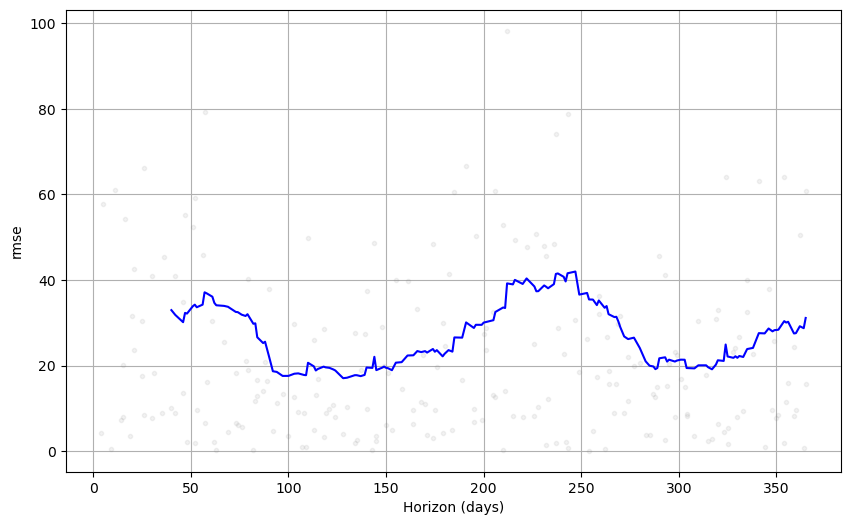

In [37]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from prophet.plot import plot_cross_validation_metric
figure = plot_cross_validation_metric(df_cv, metric = 'rmse') #RMSE graph
plt.show()

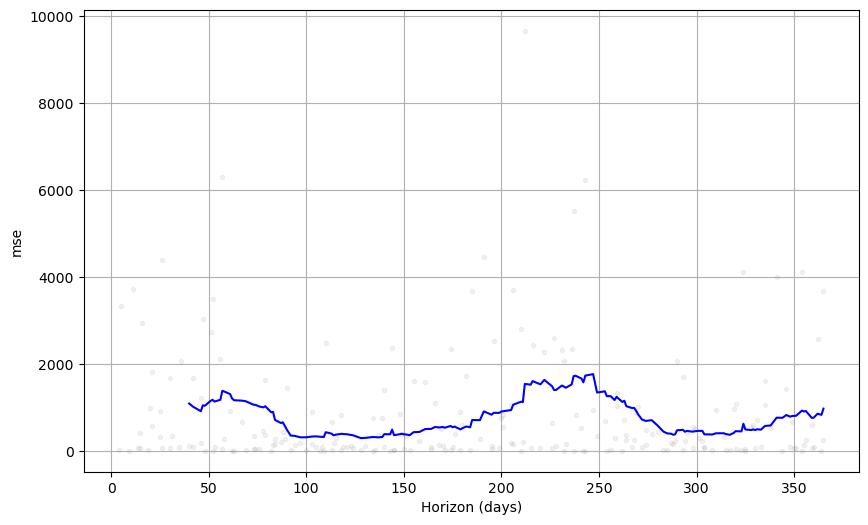

In [38]:
from prophet.plot import plot_cross_validation_metric
figure = plot_cross_validation_metric(df_cv, metric = 'mse') #MSE graph
plt.show()

In [40]:
df_performance #shows 365 days horizon

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,1085.996361,32.954459,25.802013,0.078130,0.073928,0.079188,0.227273
1,42 days,1013.218091,31.831087,25.248620,0.076989,0.073928,0.077721,0.181818
2,46 days,907.957456,30.132332,24.663440,0.078842,0.078980,0.078630,0.136364
3,47 days,1043.721662,32.306681,26.840833,0.082018,0.085537,0.082195,0.136364
4,48 days,1033.331185,32.145469,26.297951,0.080148,0.085537,0.080390,0.181818
...,...,...,...,...,...,...,...,...
165,359 days,756.265726,27.500286,21.334642,0.067176,0.056220,0.066905,0.295455
166,360 days,759.791742,27.564320,21.614324,0.068039,0.056220,0.067786,0.272727
167,362 days,851.734832,29.184496,22.858788,0.067082,0.056220,0.067331,0.272727
168,364 days,825.153019,28.725477,21.786248,0.064156,0.049559,0.064504,0.318182


'coverage' means the difference between yhat_upper and yhat_lower.